# Section 1: Text processing and linguistic insights


# 1.1	Writing style and dependency parsing


In [1]:
!pip install spacy

In [5]:

!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.7 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Importing important libraries

In [3]:
import json
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading spacy English model

In [17]:
nlp = spacy.load("en_core_web_sm")

# Loading the JSON file

In [21]:
file_path = "./stories.json"
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

# Exploring data/stories/metadata in json file

In [19]:
print(data)

{'stories': [{'index': 0, 'theme': 'redemption', 'setting': 'post-apocalyptic world', 'person': 'explorer', 'style': 'descriptive', 'outcome': 'defeat', 'object_concept': 'trombone', 'story': "In a reality where pillars of fire had danced from the heavens and sweaters of ash blanketed the ground, a solitary figure stood, steadfast in his quest for a semblance of the crumbled past. Something had shifted within this solitary figure when the scars of the world had started running too deep, his loneliness became a breeding ground for a seraphic resolve. Swaddled in worn-out cloaks that bore the pride of past expeditions, his tired feet had walked a thousand melancholic miles, steering his course through landscapes carved by catastrophe.\\n\\nThe sun was a sullen smudge in the dusty air, casting a sickly glow over charred hulks of once towering buildings, skeletal trees, and the ammonia-tinged seas. The lone voyager, with a face weathered by resilience and eyes that bore silent testimonies 

In [21]:
data["stories"]

[{'index': 0,
  'theme': 'redemption',
  'setting': 'post-apocalyptic world',
  'person': 'explorer',
  'style': 'descriptive',
  'outcome': 'defeat',
  'object_concept': 'trombone',
  'story': "In a reality where pillars of fire had danced from the heavens and sweaters of ash blanketed the ground, a solitary figure stood, steadfast in his quest for a semblance of the crumbled past. Something had shifted within this solitary figure when the scars of the world had started running too deep, his loneliness became a breeding ground for a seraphic resolve. Swaddled in worn-out cloaks that bore the pride of past expeditions, his tired feet had walked a thousand melancholic miles, steering his course through landscapes carved by catastrophe.\\n\\nThe sun was a sullen smudge in the dusty air, casting a sickly glow over charred hulks of once towering buildings, skeletal trees, and the ammonia-tinged seas. The lone voyager, with a face weathered by resilience and eyes that bore silent testimonie

In [23]:
data["stories"][0]

{'index': 0,
 'theme': 'redemption',
 'setting': 'post-apocalyptic world',
 'person': 'explorer',
 'style': 'descriptive',
 'outcome': 'defeat',
 'object_concept': 'trombone',
 'story': "In a reality where pillars of fire had danced from the heavens and sweaters of ash blanketed the ground, a solitary figure stood, steadfast in his quest for a semblance of the crumbled past. Something had shifted within this solitary figure when the scars of the world had started running too deep, his loneliness became a breeding ground for a seraphic resolve. Swaddled in worn-out cloaks that bore the pride of past expeditions, his tired feet had walked a thousand melancholic miles, steering his course through landscapes carved by catastrophe.\\n\\nThe sun was a sullen smudge in the dusty air, casting a sickly glow over charred hulks of once towering buildings, skeletal trees, and the ammonia-tinged seas. The lone voyager, with a face weathered by resilience and eyes that bore silent testimonies of tra

In [25]:
data["stories"][1]

{'index': 1,
 'theme': 'discovery',
 'setting': 'outer space',
 'person': 'inventor',
 'style': 'journalistic',
 'outcome': 'defeat',
 'object_concept': 'currant',
 'story': "In an epoch characterized by towering peaks of technology and insatiable curiosity, one individual stands tall, embodying this era - an architect of the novel and the unexpected. With an ingenious mind and tireless spirit, this individual has gifted humanity with numerous marvels in a realm untouched by terrestrial confines. Our protagonist's most recent endeavor entails a craft designed for the celestial expanse, an arena that offers as much potential for peril as it does for progress. \\n\\nThis craft, unlike anything before it, incorporates many untested advancements in technological achievement. Among these is a groundbreaking propulsion system that harnesses the energy of a miniature quantum singularity, a creation far beyond conventional understanding. Our protagonist's audacity in venturing into such unchar

# Function to compute the longest dependency span in a sentence

In [28]:
def get_longest_dependency_span(sentence):
    """
    Computes the longest dependency span in a sentence.
    Dependency span is measured as the maximum distance between 
    a token and its head in the dependency tree.
    """
    doc = nlp(sentence)
    max_dep = 0
    for token in doc:
        span = abs(token.i - token.head.i)  # Calcukating distance between token and its head
        if span > max_dep:
            max_dep = span
    return max_dep


# Processing all stories and computing ave_max_dep per story

In [30]:
from tqdm import tqdm


story_data = []

print("Processing stories...")

for story in tqdm(data['stories'], desc="Processing", unit="story"):
    sentences = [sent.text for sent in nlp(story['story']).sents]
    max_dep_spans = [get_longest_dependency_span(sent) for sent in sentences]
    ave_max_dep = sum(max_dep_spans) / len(max_dep_spans) if max_dep_spans else 0  # To avoid division by zero

    story_data.append({
        "index": story['index'],
        "style": story['style'],
        "outcome": story['outcome'],  # added for POS- next step of assignment
        "ave_max_dep": ave_max_dep
    })

print("Average Maximum Dependency Span calculation completed successfully!")


Processing stories...


Processing: 100%|██████████████████████████| 602/602 [01:10<00:00,  8.48story/s]

Average Maximum Dependency Span calculation completed successfully!


In [108]:
print(story_data)

[{'index': 0, 'style': 'descriptive', 'outcome': 'defeat', 'ave_max_dep': 22.5}, {'index': 1, 'style': 'journalistic', 'outcome': 'defeat', 'ave_max_dep': 16.5625}, {'index': 2, 'style': 'journalistic', 'outcome': 'victory', 'ave_max_dep': 16.45}, {'index': 3, 'style': 'journalistic', 'outcome': 'victory', 'ave_max_dep': 16.941176470588236}, {'index': 4, 'style': 'descriptive', 'outcome': 'victory', 'ave_max_dep': 48.55555555555556}, {'index': 5, 'style': 'concise', 'outcome': 'defeat', 'ave_max_dep': 3.6129032258064515}, {'index': 6, 'style': 'concise', 'outcome': 'defeat', 'ave_max_dep': 5.533333333333333}, {'index': 7, 'style': 'concise', 'outcome': 'defeat', 'ave_max_dep': 4.829268292682927}, {'index': 8, 'style': 'poetic', 'outcome': 'victory', 'ave_max_dep': 33.18181818181818}, {'index': 9, 'style': 'descriptive', 'outcome': 'victory', 'ave_max_dep': 26.583333333333332}, {'index': 10, 'style': 'journalistic', 'outcome': 'defeat', 'ave_max_dep': 21.9375}, {'index': 11, 'style': 'j

# Converting to DataFrame for easy calculations, visualization and further analysis


In [38]:
df = pd.DataFrame(story_data)


# Save processed data for further analysis
df.to_csv("dependency_analysis_results_by_Hina.csv", index=False)

# Showing Numerical Output to get an idea of calculation

In [40]:
print("\n=== Numerical Output of ave_max_dep for Each Story ===")
print(df)



=== Numerical Output of ave_max_dep for Each Story ===
     index         style  outcome  ave_max_dep
0        0   descriptive   defeat    22.500000
1        1  journalistic   defeat    16.562500
2        2  journalistic  victory    16.450000
3        3  journalistic  victory    16.941176
4        4   descriptive  victory    48.555556
..     ...           ...      ...          ...
597    597  journalistic  victory    15.944444
598    598        poetic  victory    31.090909
599    599   descriptive   defeat    38.111111
600    600  for children   defeat    10.583333
601    601       concise  victory     5.431373

[602 rows x 4 columns]


# Showing Top 10 Most Complex Stories

In [58]:
top_10_stories = df.sort_values(by="ave_max_dep", ascending=False).head(10)

print("\n=== Top 10 Stories with Maximum Dependency Span ===")
print(top_10_stories[['index', 'style', 'ave_max_dep']].to_string(index=False))


=== Top 10 Stories with Maximum Dependency Span ===
 index       style  ave_max_dep
     4 descriptive    48.555556
    23 descriptive    43.285714
   470 descriptive    42.714286
   121 descriptive    42.500000
   272 descriptive    41.833333
    60 descriptive    41.625000
   562 descriptive    41.375000
   456 descriptive    40.285714
   421 descriptive    39.800000
    30 descriptive    38.300000


# Raincloud for visualization and analysis of stories with max or min dependency span

/var/folders/ml/23lnxp3n2gs0vq78xwywvdm00000gn/T/ipykernel_1856/3819743729.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="style", y="ave_max_dep", data=df, inner=None, palette=palette, alpha=0.6)  # Colored violin plot


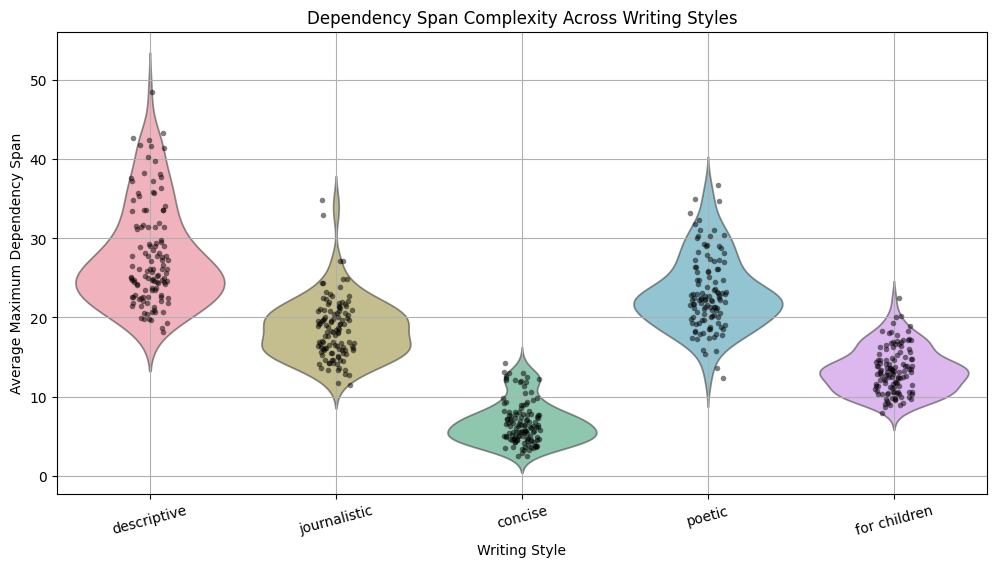


Processing complete. Data saved to dependency_analysis_results_by_Hina.csv.


In [43]:
# Colored Raincloud Plot
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(df["style"].unique()))  # Different colors for each style
sns.violinplot(x="style", y="ave_max_dep", data=df, inner=None, palette=palette, alpha=0.6)  # Colored violin plot
sns.stripplot(x="style", y="ave_max_dep", data=df, jitter=True, size=4, color="black", alpha=0.5)  # Scatter plot
plt.xlabel("Writing Style")
plt.ylabel("Average Maximum Dependency Span")
plt.title("Dependency Span Complexity Across Writing Styles")
plt.xticks(rotation=15)
plt.grid()
plt.show()

print("\nProcessing complete. Data saved to dependency_analysis_results_by_Hina.csv.")

In [39]:
!pip install ptitprince


  Preparing metadata (setup.py) ... done
  Using cached seaborn-0.11.0-py3-none-any.whl.metadata (2.2 kB)
Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10655 sha256=21c16fdc12bf856a74df21289dd9a9a8104f286bd6a65c97284d11311306ea39
  Stored in directory: /Users/hinaghazanfar/Library/Caches/pip/wheels/9c/9b/f3/1dcbf07713ad90fa461c6a8c0c0bec1a113d865a3ce3ab10b9
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2


In [49]:
!pip install joypy


<Figure size 1200x600 with 0 Axes>

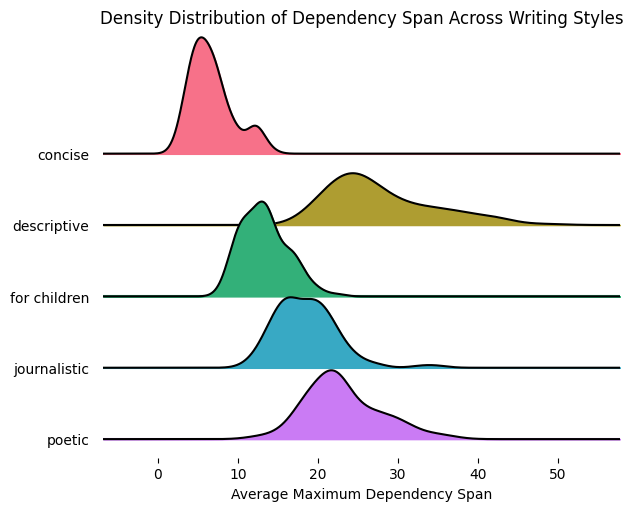

In [104]:
from joypy import joyplot

# --- Joyplot Alternative for Raincloud Plot ---
plt.figure(figsize=(12, 6))

# Use a colormap similar to "husl" for styling
joyplot(
    data=df[['ave_max_dep', 'style']],  # Select columns for visualization
    by='style',  # Group by 'style'
    colormap=sns.color_palette("husl", as_cmap=True)
)

# Labels and Title
plt.xlabel("Average Maximum Dependency Span")
plt.ylabel("Writing Style")
plt.title("Density Distribution of Dependency Span Across Writing Styles")

plt.show()


**I was getting error in plotting raincloud. Tried alot but in-vain so decided to plot joyplot resembles to raincloud.**

In [47]:
import ptitprince as pt  # Import ptitprince for raincloud plot
# --- Raincloud Plot ---
plt.figure(figsize=(12, 6))
ax = pt.RainCloud(x="style", y="ave_max_dep", data=df, 
                  palette="husl", bw=0.2, width_viol=0.6, 
                  width_box=0.2, orient="v", move=0.2)
plt.xlabel("Writing Style")
plt.ylabel("Average Maximum Dependency Span")
plt.title("Raincloud Plot: Dependency Span Complexity Across Writing Styles")
plt.xticks(rotation=15)
plt.grid()
plt.show()

ImportError: cannot import name '_CategoricalScatterPlotter' from 'seaborn.categorical' (/Users/hinaghazanfar/Documents/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py)

# ----------------1.2	POS(Parts Of Speech) Tagging---------------------

In [60]:
from scipy.stats import ttest_ind

# POS Tagging Function for counting

In [64]:
def count_pos_tags(text):
    """
    Counts occurrences of each POS tag in a given text.
    Uses spaCy's POS tagging based on the Penn Treebank tagset.
    """
    doc_stories = nlp(text)
    pos_counts = {}
    for token in doc_stories:
        pos_counts[token.pos_] = pos_counts.get(token.pos_, 0) + 1
    return pos_counts

# Processing POS Tag Counts and Merging with Existing df

In [72]:
print("Processing POS tag counts for stories...")
pos_data = []

# Using the existing DataFrame from Part 1 of Phase 1
#for idx, row in df.iterrows():  # Using the existing DataFrame from Part 1 of Phase 1
for idx, row in tqdm(df.iterrows(), total=len(df), desc="Processing", unit="row"):    
    pos_counts = count_pos_tags(data['stories'][row["index"]]["story"])  # Process the corresponding story
    pos_counts['index'] = row["index"]
    pos_counts['outcome'] = data['stories'][row["index"]]["outcome"]
    pos_data.append(pos_counts)

print("POS tag counting completed successfully!")

Processing POS tag counts for stories...


Processing: 100%|████████████████████████████| 602/602 [00:27<00:00, 21.77row/s]

POS tag counting completed successfully!


# Converting pos_data into DataFrame

In [77]:
# (fill NaN for missing tags) as it was gving errors
df_pos = pd.DataFrame(pos_data).fillna(0)

# Merging POS data with the original df
df = df.merge(df_pos, on=["index", "outcome"], how="left")
# Dropping duplicate POS tag columns after merge as it was being showin twice
for col in df.columns:
    if col.endswith("_pos"):
        df[col.replace("_pos", "")] = df[col] 
        df.drop(columns=[col.replace("_pos", "_x"), col.replace("_pos", "_y")], errors="ignore", inplace=True)

# Save processed POS data
df.to_csv("pos_analysis_results_by_Hina.csv", index=False)


In [79]:
df_pos.head()

,ADP,DET,NOUN,SCONJ,AUX,VERB,CCONJ,PUNCT,ADJ,PRON,ADV,NUM,PROPN,PART,index,outcome,INTJ,X,SPACE,SYM
0,66,64,120,6.0,14.0,57,9.0,48,48,27,12,1.0,3.0,6.0,0,defeat,0.0,0.0,0.0,0.0
1,47,54,106,4.0,7.0,47,10.0,48,44,21,7,1.0,7.0,11.0,1,defeat,1.0,0.0,0.0,0.0
2,59,52,120,8.0,16.0,48,15.0,64,35,42,22,1.0,10.0,1.0,2,victory,0.0,0.0,0.0,0.0
3,53,49,96,10.0,9.0,49,6.0,43,38,24,10,2.0,16.0,14.0,3,victory,0.0,0.0,0.0,0.0
4,84,57,135,4.0,11.0,59,16.0,57,54,49,17,1.0,3.0,5.0,4,victory,0.0,0.0,0.0,0.0


In [81]:
df.head()

,index,style,outcome,ave_max_dep,ADP,DET,NOUN,SCONJ,AUX,VERB,...,ADJ,PRON,ADV,NUM,PROPN,PART,INTJ,X,SPACE,SYM
0,0,descriptive,defeat,22.500000,66,64,120,6.0,14.0,57,...,48,27,12,1.0,3.0,6.0,0.0,0.0,0.0,0.0
1,1,journalistic,defeat,16.562500,47,54,106,4.0,7.0,47,...,44,21,7,1.0,7.0,11.0,1.0,0.0,0.0,0.0
2,2,journalistic,victory,16.450000,59,52,120,8.0,16.0,48,...,35,42,22,1.0,10.0,1.0,0.0,0.0,0.0,0.0
3,3,journalistic,victory,16.941176,53,49,96,10.0,9.0,49,...,38,24,10,2.0,16.0,14.0,0.0,0.0,0.0,0.0
4,4,descriptive,victory,48.555556,84,57,135,4.0,11.0,59,...,54,49,17,1.0,3.0,5.0,0.0,0.0,0.0,0.0


In [83]:
# --- Display Overall POS Frequencies ---
numeric_cols = df_pos.drop(columns=["index", "outcome"]).select_dtypes(include=["number"])  # Select only numeric columns
pos_totals = numeric_cols.sum().sort_values(ascending=False)  # Sum POS tags and sort

print("\n=== Overall POS Tag Frequencies Across All Stories ===")
print(pos_totals)


=== Overall POS Tag Frequencies Across All Stories ===
NOUN     61051.0
PUNCT    34141.0
VERB     32044.0
ADP      30767.0
DET      30000.0
ADJ      20758.0
PRON     20694.0
ADV       7666.0
AUX       6949.0
CCONJ     6338.0
PROPN     4969.0
PART      4863.0
SCONJ     2324.0
NUM        624.0
INTJ        70.0
X           59.0
SPACE       20.0
SYM          5.0
dtype: float64


In [ ]:
# --- Display Overall POS Frequencies ---
numeric_cols = df.drop(columns=["index", "outcome"]).select_dtypes(include=["number"])  # Select only numeric columns
pos_totals = numeric_cols.sum().sort_values(ascending=False)  # Sum POS tags and sort

print("\n=== Overall POS Tag Frequencies Across All Stories ===")
print(pos_totals)

# Hypothesis: POS Tags Likely to Differ Between Victory & Defeat

In [91]:
# Select the 5 most frequent POS tags
top_5_tags = pos_totals.head(5).index.tolist()  
print(top_5_tags)

['NOUN', 'PUNCT', 'VERB', 'ADP', 'DET']


In [100]:
# Statistical Test (Unpaired t-test)
print("\n=== T-Test Results: POS Tag Differences Between Victory & Defeat ===")
for tag in top_5_tags:
    victory_vals = df[df["outcome"] == "victory"][tag]
    defeat_vals = df[df["outcome"] == "defeat"][tag]
    print("Victory: ",victory_vals)
    print("Defeat: ", defeat_vals)
    t_stat, p_val = ttest_ind(victory_vals, defeat_vals, equal_var=False)  # Welch’s t-test
    print(f"POS Tag: {tag}, T-Statistic: {t_stat:.4f}, P-Value: {p_val:.4f}")


=== T-Test Results: POS Tag Differences Between Victory & Defeat ===
Victory:  2      120
3       96
4      135
8      115
9      130
      ... 
595    120
596    123
597    100
598    136
601     90
Name: NOUN, Length: 291, dtype: int64
Defeat:  0      120
1      106
5       87
6       91
7       66
      ... 
589    122
590    105
592     74
599    112
600     46
Name: NOUN, Length: 311, dtype: int64
POS Tag: NOUN, T-Statistic: 0.6059, P-Value: 0.5448
Victory:  2      64
3      43
4      57
8      47
9      57
       ..
595    52
596    58
597    46
598    56
601    89
Name: PUNCT, Length: 291, dtype: int64
Defeat:  0      48
1      48
5      91
6      69
7      63
       ..
589    57
590    41
592    61
599    48
600    48
Name: PUNCT, Length: 311, dtype: int64
POS Tag: PUNCT, T-Statistic: 1.9170, P-Value: 0.0557
Victory:  2      48
3      49
4      59
8      61
9      71
       ..
595    53
596    57
597    42
598    55
601    75
Name: VERB, Length: 291, dtype: int64
Defeat:  0   

In [93]:
# Statistical Test (Unpaired t-test)
print("\n=== T-Test Results: POS Tag Differences Between Victory & Defeat ===")
for tag in top_5_tags:
    victory_vals = df[df["outcome"] == "victory"][tag]
    defeat_vals = df[df["outcome"] == "defeat"][tag]
    t_stat, p_val = ttest_ind(victory_vals, defeat_vals, equal_var=False)  # Welch’s t-test
    print(f"POS Tag: {tag}, T-Statistic: {t_stat:.4f}, P-Value: {p_val:.4f}")


=== T-Test Results: POS Tag Differences Between Victory & Defeat ===
POS Tag: NOUN, T-Statistic: 0.6059, P-Value: 0.5448
POS Tag: PUNCT, T-Statistic: 1.9170, P-Value: 0.0557
POS Tag: VERB, T-Statistic: 0.8415, P-Value: 0.4004
POS Tag: ADP, T-Statistic: 0.4777, P-Value: 0.6330
POS Tag: DET, T-Statistic: 1.1346, P-Value: 0.2570


# Visualization: POS Tag Differences by Story Outcome

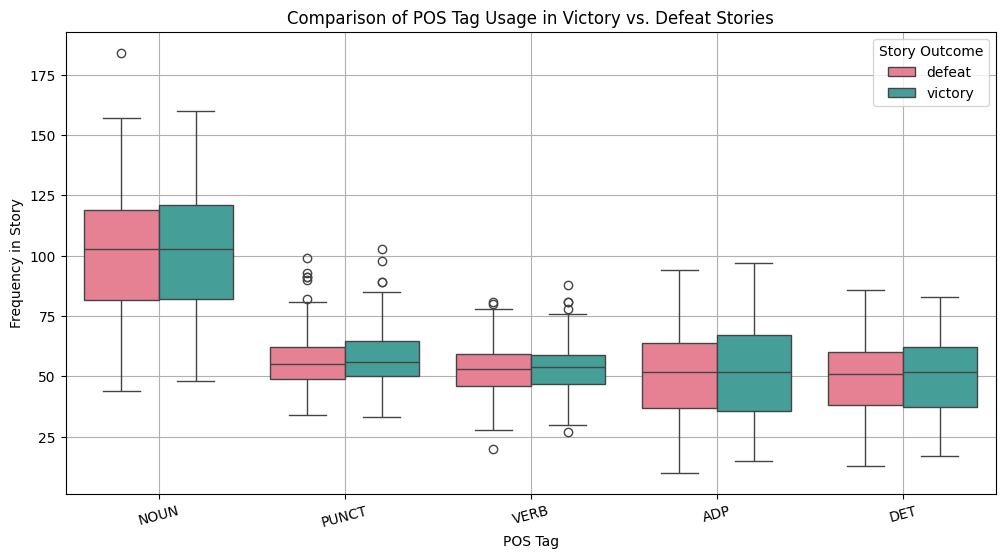


Processing complete. Data saved to pos_analysis_results_by_Hina.csv.


In [96]:
df_melted = df.melt(id_vars=["index", "outcome"], value_vars=top_5_tags, var_name="POS Tag", value_name="Count")

plt.figure(figsize=(12, 6))
sns.boxplot(x="POS Tag", y="Count", hue="outcome", data=df_melted, palette="husl")
plt.xlabel("POS Tag")
plt.ylabel("Frequency in Story")
plt.title("Comparison of POS Tag Usage in Victory vs. Defeat Stories")
plt.legend(title="Story Outcome")
plt.xticks(rotation=15)
plt.grid()
plt.show()

print("\nProcessing complete. Data saved to pos_analysis_results_by_Hina.csv.")